In [1]:
import numpy as np
from scipy import sparse
import WeightUpdate as wp 
from Network import Network
import plotly
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='zachcohen1', api_key='HwJ4lwUFUQdbGERv6wY0')
# plotly.tools.set_config_file(world_readable=True,sharing='public')

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

class Driver:
    """ Network driver. Run the network and see what happens."""
    def __init__(self, period, time_constant, num_neurons, p, chaotic_constant, input_num, 
                 output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                 g_gz, alpha, dt):
        
        self.period = period 
        self.time_constant = time_constant 
        self.num_neurons = num_neurons
        self.chaotic_constant = chaotic_constant
        self.input_num = input_num 
        self.output_num = output_num
        self.gg_sparseness = gg_sparseness
        self.gz_sparseness = gz_sparseness
        self.fg_sparseness = fg_sparseness
        self.readout_sparseness = readout_sparseness
        self.g_gz = g_gz
        self.p = p
        
        # initiate a nework
        self.network = Network(time_constant, num_neurons, p, chaotic_constant, input_num, 
                               output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                               g_gz, dt)
        
        # try a sine wave
        self.target_function = [ np.sin(i/10) for i in my_range(0, period, dt) ]
        
        self.alpha = alpha
        x = self.network.membrane_potential # x(0)
        print("should be all zeros", x)
        w_t = np.zeros(num_neurons) # w(0)
        P = (1/alpha) * np.identity(output_num) # P(0)
        
        # plot
        target = []
        neuron_one_train = []
        neuron_one_test = []
        xs = []
        
        # train
        for i in range(int(period / dt)):
            #x = self.network.membrane_potential
            #r = np.tanh(x)
            #z = np.dot(np.transpose(w_t), r)
            #P_temp = wp.P_t(output_num, P, r)
            #w_t = wp.w_t(output_num, P, r, w_t, self.target_function[i])
            #self.network.prop(z, r)
            #neuron_one_train.append(z) # plotting
            target.append(self.target_function[i]) # plotting
            xs.append(i) # plotting
            #P = P_temp # P(t - dt)
    
        # test
        for i in range(int(period / dt)):
            #if (i < 10):
                #print(x)
            x = self.network.membrane_potential
            r = np.tanh(x)
            z = np.dot(np.transpose(w_t), r)
            self.network.prop(z, r) 
            neuron_one_test.append(z) # plotting
            #if (i < 10):
                #print(self.network.membrane_potential)
        
        trace_0 = go.Scatter(
            x = xs,
            y = neuron_one_train,
            mode = 'markers'
        )
        trace_1 = go.Scatter(
            x = xs,
            y = neuron_one_test,
            mode = 'markers'
        )
        target_trace = go.Scatter(
            x = xs,
            y = target,
            mode = 'markers'
        )
        print("yo")
        data = go.Data([trace_0, trace_1, target_trace])
        
        plotly.plotly.iplot(data, filename='basic-scatter')

period = 200.0
time_constant = 0.1 
num_neurons = 100
chaotic_constant = 1.7
input_num = 100
output_num = 100
gg_sparseness = 0.8
gz_sparseness = 0.9
fg_sparseness = 0.9
readout_sparseness = 0.1
g_gz = 0.2
alpha = 1.0
dt = 0.1
p = 0.1
driv = Driver(period, time_constant, num_neurons, p, chaotic_constant, input_num, 
              output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness, 
              g_gz, alpha, dt)


array of zeros supposedly [ 0.35197758 -1.01162841 -0.50432766 -0.68298946 -0.24664853 -0.24316996
 -0.29998142  0.84217725 -0.29933156  0.473921    0.42197876 -0.6186654
 -0.21479221  0.39280878  0.56514147 -0.32876025 -0.08504647 -0.01571406
  0.17121528 -0.53783203  1.14159276 -0.36812925  0.03079583  0.55760634
  0.38567563 -0.00506608  0.1372702   0.61901702 -0.47256962  0.82688646
 -0.25326774  0.3898678   0.05867421  0.11808613  0.10841455  0.00933736
  0.70125141 -0.46317124  0.12175969 -0.2454614   0.05437293  0.89022498
 -0.24312911  0.10665856  0.29227521  0.67303715 -0.51624452 -0.80100426
  0.15924921  0.39283747  0.11283534  0.17952515 -0.02606257  0.1006588
 -0.23733477 -0.09623036  0.01872051  0.09055693 -0.22995581  0.70689369
  0.60519067  0.62002479  0.92210924  0.50214888  1.18263648  0.69399069
  0.03139749 -0.33591747  0.27368934  0.02500932  0.34175785 -0.23711704
  0.01353806  0.11198699  0.21295154 -0.01530173  1.25871173  0.07123379
  0.26148804 -0.61720163 -0

In [5]:
import numpy as np
from scipy import sparse
import WeightUpdate as wp 
from Network import Network
import plotly
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='zachcohen1', api_key='HwJ4lwUFUQdbGERv6wY0')
# plotly.tools.set_config_file(world_readable=True,sharing='public')

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

class Driver:
    """ Network driver. Run the network and see what happens."""
    def __init__(self, period, time_constant, num_neurons, p, chaotic_constant, input_num, 
                 output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                 g_gz, alpha, dt):
        
        self.period = period 
        self.time_constant = time_constant 
        self.num_neurons = num_neurons
        self.chaotic_constant = chaotic_constant
        self.input_num = input_num 
        self.output_num = output_num
        self.gg_sparseness = gg_sparseness
        self.gz_sparseness = gz_sparseness
        self.fg_sparseness = fg_sparseness
        self.readout_sparseness = readout_sparseness
        self.g_gz = g_gz
        self.p = p
        
        # initiate a nework
        self.network = Network(time_constant, num_neurons, p, chaotic_constant, input_num, 
                               output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                               g_gz, dt)
        
        # try a sine wave
        self.target_function = [ np.sin(i/10) for i in my_range(0, period, dt) ]
        
        self.alpha = alpha
        x = self.network.membrane_potential # x(0)
        w_t = np.zeros(num_neurons) # w(0)
        P = (1/alpha) * np.identity(output_num) # P(0)
        
        # plot
        target = []
        neuron_one_train = []
        neuron_one_test = []
        xs = []
        
        # test neurons
        neuron_1 = []
        neuron_2 = []
        neuron_3 = []
        
        # train
        for i in range(int(period / dt)):
            #x = self.network.membrane_potential
            #r = np.tanh(x)
            #z = np.dot(np.transpose(w_t), r)
            #P_temp = wp.P_t(output_num, P, r)
            #w_t = wp.w_t(output_num, P, r, w_t, self.target_function[i])
            #self.network.prop(z, r)
            #neuron_one_train.append(z) # plotting
            target.append(self.target_function[i]) # plotting
            xs.append(i) # plotting
            #P = P_temp # P(t - dt)
    
        # test
        for i in range(int(period / dt)):
            #if (i < 10):
                #print(x)
            x = self.network.membrane_potential
            r = np.tanh(x)
            neuron_1.append(x[11])
            neuron_2.append(x[37])
            neuron_3.append(x[91])
            z = np.dot(np.transpose(w_t), r)
            self.network.prop(z, r) 
            neuron_one_test.append(z) # plotting
            #if (i < 10):
                #print(self.network.membrane_potential)
        
        trace_0 = go.Scatter(
            x = xs,
            y = neuron_one_train,
            mode = 'markers'
        )
        trace_1 = go.Scatter(
            x = xs,
            y = neuron_1,
            mode = 'markers'
        )
        trace_2 = go.Scatter(
            x = xs,
            y = neuron_2,
            mode = 'markers'
        )
        trace_3 = go.Scatter(
            x = xs,
            y = neuron_3,
            mode = 'markers'
        )
        target_trace = go.Scatter(
            x = xs,
            y = target,
            mode = 'markers'
        )
        print("yo")
        data = go.Data([trace_0, trace_1, trace_2, trace_3, target_trace])
        
        plotly.plotly.iplot(data, filename='basic-scatter')

period = 200.0
time_constant = 0.1 
num_neurons = 100
chaotic_constant = 0.9
input_num = 100
output_num = 100
gg_sparseness = 0.9
gz_sparseness = 0.9
fg_sparseness = 0.9
readout_sparseness = 0.1
g_gz = 0.2
alpha = 1.0
dt = 0.1
p = 0.1
driv = Driver(period, time_constant, num_neurons, p, chaotic_constant, input_num, 
              output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness, 
              g_gz, alpha, dt)



array of zeros supposedly [ 0.68103538 -0.72713763 -0.76615667 -0.20071686  0.3677235  -0.43081138
 -0.49444559 -0.82838083  0.01147337  0.22437467  0.66755342  0.15005214
  0.18459923  0.00328729  0.42532879  0.08455163 -0.7299975  -0.09435798
  0.46637873  0.65749938 -0.30106892 -0.59988119  0.39826433 -0.68215421
 -0.89682748 -0.26698114 -0.65778306  0.40618144  0.57763966  0.18766613
 -1.42764622  0.73777413 -0.12487772  0.68306114 -0.29508992 -0.18180401
  0.24235147 -0.66896932  0.48762303 -0.01194876  0.50206836  0.29823297
  0.01627515  0.05466913 -0.42177183  0.37195298  0.76134668 -0.03890624
 -0.29317162  0.4256302  -0.2884484  -0.58481789  0.09570463 -0.50454548
 -0.00911952 -0.24212652  0.36449009  0.02132183 -0.55110194  0.18122541
  0.17502863  0.87287411  0.10943573  0.46240704  0.01313431  0.40711562
 -0.14807616  0.23666745  0.46354924 -0.68360314  0.36234736 -0.06226861
 -0.20958245 -1.14924456 -0.02734462 -0.24517133 -0.70464871  0.7265334
  0.42749036  0.27257513  

In [1]:
import numpy as np
from scipy import sparse
import WeightUpdate as wp 
from Network import Network
import plotly
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='zachcohen1', api_key='HwJ4lwUFUQdbGERv6wY0')
# plotly.tools.set_config_file(world_readable=True,sharing='public')

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

class Driver:
    """ Network driver. Run the network and see what happens."""
    def __init__(self, period, time_constant, num_neurons, p, chaotic_constant, input_num, 
                 output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                 g_gz, alpha, dt):
        
        self.period = period 
        self.time_constant = time_constant 
        self.num_neurons = num_neurons
        self.chaotic_constant = chaotic_constant
        self.input_num = input_num 
        self.output_num = output_num
        self.gg_sparseness = gg_sparseness
        self.gz_sparseness = gz_sparseness
        self.fg_sparseness = fg_sparseness
        self.readout_sparseness = readout_sparseness
        self.g_gz = g_gz
        self.p = p
        
        # initiate a nework
        self.network = Network(time_constant, num_neurons, p, chaotic_constant, input_num, 
                               output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                               g_gz, dt)
        
        # try a sine wave
        self.target_function = [ np.sin(i/10) for i in my_range(0, period, dt) ]
        
        self.alpha = alpha
        x = self.network.membrane_potential # x(0)
        w_t = np.zeros(num_neurons) # w(0)
        P = (1/alpha) * np.identity(output_num) # P(0)
        
        # plot
        target = []
        neuron_one_train = []
        neuron_one_test = []
        xs = []
        
        # test neurons
        neuron_1 = []
        neuron_2 = []
        neuron_3 = []
        
        # train
        for i in range(int(period / dt)):
            x = self.network.membrane_potential
            r = np.tanh(x)
            z = np.dot(np.transpose(w_t), r)
            P_temp = wp.P_t(output_num, P, r)
            w_t = wp.w_t(output_num, P, r, w_t, self.target_function[i])
            self.network.prop(z, r)
            neuron_one_train.append(z) # plotting
            target.append(self.target_function[i]) # plotting
            xs.append(i) # plotting
            P = P_temp # P(t - dt)
    
        # test
        for i in range(int(period / dt)):
            #if (i < 10):
                #print(x)
            x = self.network.membrane_potential
            r = np.tanh(x)
            neuron_1.append(x[11])
            neuron_2.append(x[37])
            neuron_3.append(x[91])
            z = np.dot(np.transpose(w_t), r)
            self.network.prop(z, r) 
            neuron_one_test.append(z) # plotting
            #if (i < 10):
                #print(self.network.membrane_potential)
        
        trace_0 = go.Scatter(
            x = xs,
            y = neuron_one_train,
            mode = 'markers'
        )
        trace_1 = go.Scatter(
            x = xs,
            y = neuron_one_test,
            mode = 'markers'
        )
        target_trace = go.Scatter(
            x = xs,
            y = target,
            mode = 'markers'
        )
        print("yo")
        data = go.Data([trace_1, target_trace])
        
        plotly.plotly.iplot(data, filename='basic-scatter')

period = 200.0
time_constant = 0.1 
num_neurons = 100
chaotic_constant = 1.7
input_num = 100
output_num = 100
gg_sparseness = 0.9
gz_sparseness = 0.9
fg_sparseness = 0.9
readout_sparseness = 0.1
g_gz = 0.2
alpha = 1.0
dt = 0.1
p = 0.1
driv = Driver(period, time_constant, num_neurons, p, chaotic_constant, input_num, 
              output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness, 
              g_gz, alpha, dt)




array of zeros supposedly [ 0.05176596  0.10846997  0.52751314  0.35539427  0.10767988 -0.45820501
 -0.34218949 -0.139343    0.05039793  0.43321119 -0.47438603 -0.73729248
  0.17516268 -0.44667298  0.13749318  0.59977691  0.38962694  0.71014489
 -0.45144531 -0.37812186 -0.39287749  1.10407847  0.14594517  0.46265221
  0.34529558  0.32758277 -0.15439708  0.2933519   0.60552446  0.741771
  0.37364691 -0.05739168  0.31462485 -0.04571595  0.84523648 -0.48777969
  0.07722993 -0.66664352 -0.05044282 -0.13448253 -1.04047657  0.17113725
  0.38641971  0.36797835 -1.03916695  0.05634788 -0.35841788  0.04567431
  0.52146285  0.28625397  0.02576668 -0.84102933 -0.12177901  0.74993809
 -0.25994896  0.01857039 -0.83890899 -0.56691813  1.07700246  0.23355591
 -0.12304535  0.18148984 -0.52511853  0.02107613 -0.61091566  0.79092674
  0.13321024  0.09809794 -0.29897207  0.66782059  0.40527007  0.25172622
  0.53249183  0.10848716 -0.04279514 -0.38067906 -0.25987972 -0.13410154
 -1.01732162  0.60329491 -0

<module 'scipy.sparse' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/sparse/__init__.py'>
array of zeros supposedly [-0.8595412  -0.50409922 -0.29890692  0.40424635  0.12610486 -0.08896073
  0.48165832  0.44034992  0.21187195 -0.09952041  0.17048695 -0.45520926
  0.21057347 -0.20894915 -0.40581165 -0.01735031  0.05478654  1.0139013
  0.27352887 -0.58849436 -0.44131925 -0.14234689 -0.01954579 -0.01254885
 -0.40700091 -0.36046334 -0.20506817 -0.4150824   0.15309855 -0.56201753
 -0.22749891  0.03850003 -0.98377818  0.18585962 -0.24182339  0.15992061
  0.11954879  0.16820857  0.62433854 -1.05170604  0.8510941  -0.1852576
 -0.00423215  0.78235163 -0.03621762 -0.2041247   0.2477435   0.86249564
 -0.54517339 -0.71277157 -0.2631313   0.22407157  0.06037906  0.61151269
 -0.53497001  0.96793686 -1.02143431  1.05541641 -0.87070121  0.49355938
 -0.28887339 -0.48025855 -0.00385231  0.88317151 -0.82565995  0.38543985
  0.17376188  0.13293819 -0.9077832  -0

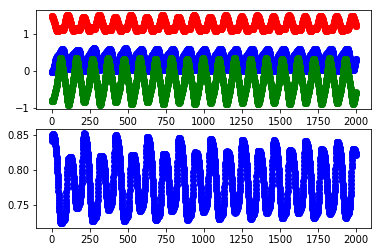

In [1]:
import numpy as np
from scipy import sparse
import WeightUpdate as wp
from Network import Network
#import plotly
#import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='zachcohen1', api_key='HwJ4lwUFUQdbGERv6wY0')
# plotly.tools.set_config_file(world_readable=True,sharing='public')
import matplotlib.pyplot as plt

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

class Driver:
    """ Network driver. Run the network and see what happens."""
    def __init__(self, period, time_constant, num_neurons, p, chaotic_constant, input_num,
                 output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                 g_gz, alpha, dt):

        self.period = period
        self.time_constant = time_constant
        self.num_neurons = num_neurons
        self.chaotic_constant = chaotic_constant
        self.input_num = input_num
        self.output_num = output_num
        self.gg_sparseness = gg_sparseness
        self.gz_sparseness = gz_sparseness
        self.fg_sparseness = fg_sparseness
        self.readout_sparseness = readout_sparseness
        self.g_gz = g_gz
        self.p = p

        # initiate a nework
        self.network = Network(time_constant, num_neurons, p, chaotic_constant, input_num,
                               output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
                               g_gz, dt)

        # try a sine wave
        self.target_function = [ np.sin(i/10) for i in my_range(0, period, dt) ]

        self.alpha = alpha
        x = self.network.membrane_potential # x(0)
        w_t = np.zeros(num_neurons) # w(0)
        P = (1/alpha) * np.identity(output_num) # P(0)

        # plot
        target = []
        neuron_one_train = []
        neuron_one_test = []
        xs = []

        # test neurons
        neuron_1 = []
        neuron_2 = []
        neuron_3 = []

        # train
        for i in range(int(period / dt)):
            x = self.network.membrane_potential
            r = np.tanh(x)
            z = np.dot(np.transpose(w_t), r)
            P_temp = wp.P_t(output_num, P, r)
            w_t = wp.w_t(output_num, P, r, w_t, self.target_function[i])
            self.network.prop(z, r)
            neuron_one_train.append(z) # plotting
            target.append(self.target_function[i]) # plotting
            xs.append(i) # plotting
            P = P_temp # P(t - dt)

        # test
        for i in range(int(period / dt)):
            #if (i < 10):
                #print(x)
            x = self.network.membrane_potential
            r = np.tanh(x)
            neuron_1.append(x[11])
            neuron_2.append(x[37])
            neuron_3.append(x[91])
            z = np.dot(np.transpose(w_t), r)
            self.network.prop(z, r)
            neuron_one_test.append(z) # plotting
            #if (i < 10):
                #print(self.network.membrane_potential)

        """
        trace_0 = go.Scatter(
            x = xs,
            y = neuron_one_train,
            mode = 'markers'
        )
        trace_1 = go.Scatter(
            x = xs,
            y = neuron_one_test,
            mode = 'markers'
        )
        target_trace = go.Scatter(
            x = xs,
            y = target,
            mode = 'markers'
        )
        print("yo")
        data = go.Data([trace_1, target_trace])

        plotly.plotly.iplot(data, filename='basic-scatter')
        """
        ##take out
        plt.figure(1)
        plt.subplot(211)
        plt.plot(xs, neuron_1, 'bo', xs, neuron_2, 'ro', xs, neuron_3, 'go')

        plt.subplot(212)
        plt.plot(xs, neuron_one_test, 'bo')
        plt.show()

period = 200.0
time_constant = 0.1
num_neurons = 100
chaotic_constant = 1.7
input_num = 100
output_num = 100
gg_sparseness = 0.9
gz_sparseness = 0.9
fg_sparseness = 0.9
readout_sparseness = 0.1
g_gz = 0.2
alpha = 1.0
dt = 0.1
p = 0.1
driv = Driver(period, time_constant, num_neurons, p, chaotic_constant, input_num,
              output_num, gg_sparseness, gz_sparseness, fg_sparseness, readout_sparseness,
              g_gz, alpha, dt)
